## 머신러닝 응용

## 08. 미니 프로젝트

<img src = "https://images.unsplash.com/photo-1499310392581-322cec0355a6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1548&q=80" width=80% align="center"/>

<div align="right">사진: <a href="https://unsplash.com/ko/%EC%82%AC%EC%A7%84/5Za2sS955yg?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>의<a href="https://unsplash.com/@plhnk?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Paul Hanaoka</a>
  
  </div>

### 문제 설명
여러분은 캘리포니아의 주택 가격을 예측하는 것을 목표로 하고 있습니다. <br> 
사이킷런의 캘리포니아 주택 가격 데이터셋을 활용하여, 주택 가격을 예측하는 머신러닝 앙상블 모델을 개발해야 합니다.  

### 파일 설명
데이터 파일은 세개가 있습니다. 
- 학습 데이터 : train.csv
- 예측 데이터 : test.csv ('target'을 제외한 'feature' 정보만 포함한 실제로 예측해야 되는 데이터)
- 실제 데이터 : actual_value.csv ('test.csv'의 실제 정답 데이터)

⛔️ 주의 사항 : 모델 학습 시에는 학습 데이터('train.csv') 외에는 사용하면 안됩니다.

### 데이터 설명
주어진 데이터에는 다양한 특성들이 포함되어 있습니다. 몇 가지 일반적인 특성은 다음과 같습니다.

[Feature]
- MedInc : 해당 지역의 중간 소득
- HouseAge : 해당 지역의 주택 연식 중간값
- AveRooms : 해당 지역의 평균 방 개수
- AveBedrms : 해당 지역의 평균 침실 개수
- Population : 해당 지역의 인구 수
- AveOccup : 해당 지역의 평균 입주자 수
- Latitude : 해당 지역의 위도
- Longitude : 해당 지역의 경도

[Target]
- MEDV : 주택 가격 중간값 (단위 1,000달러)

### 평가 지표
가격 예측 모델의 성능은 Root Mean Squared Error (RMSE)를 기준으로 측정됩니다. 참가자들은 주어진 훈련 데이터를 활용하여 모델을 학습시킨 후, 테스트 데이터에 대한 가격 예측을 수행합니다. 

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

#### <font color='red'>Q1</font>  데이터 셋을 불러오고, 데이터 셋의 크기, 변수의 개수 등을 파악하세요.
> 데이터 파일명 :"train.csv" 

In [2]:
# 여기에 작성하세요.
import pandas as pd

df = pd.read_csv("./data/train.csv")

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16512 non-null  float64
 1   HouseAge    16512 non-null  float64
 2   AveRooms    16512 non-null  float64
 3   AveBedrms   16512 non-null  float64
 4   Population  16512 non-null  float64
 5   AveOccup    16512 non-null  float64
 6   Latitude    16512 non-null  float64
 7   Longitude   16512 non-null  float64
 8   MEDV        16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


---

#### <font color='red'>Q2</font> 데이터셋을 학습 데이터와 검증용 데이터로 분할하세요. 
> 데이터 분리 시 옵션은 자유롭게 설정하셔도 무관합니다.

In [4]:
# 여기에 작성하세요.
from sklearn.model_selection import train_test_split

x = df.drop(columns=['MEDV'])
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### <font color='red'>Q3</font> Feature('train_x', 'test_x') 데이터 정규화 작업을 진행합니다. 
> 데이터 정규화는 MinMaxScaler를 사용하면 쉽게 할 수 있습니다. 

**📌 <font color='red'>주의사항</font>**<br>
- 정규화 작업은 Target을 제외한 Feature만 합니다. 
- Test 데이터를 정규화 작업 시 사용하면 안됩니다.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### <font color='red'>Q4</font>  앙상블 모델을 만들어 보세요. (Random Forest모델, XGBoost 모델 등)

In [6]:
# 여기에 작성하세요.
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_rf = RandomForestRegressor(random_state=42)
model_xgb = XGBRegressor(random_state=42)

#### <font color='red'>Q5</font>  모델을 평가하고, 각 알고리즘의 성능을 비교해 보세요. 

In [7]:
# 여기에 작성하세요.
model_rf.fit(x_train, y_train)
model_xgb.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)


In [8]:
from sklearn.metrics import mean_squared_error

print("Random Forest RMSE : ", mean_squared_error(y_test, y_pred_rf)**(1/2))
print("XGB RMSE : ", mean_squared_error(y_test, y_pred_xgb)**(1/2))



Random Forest RMSE :  0.5274174991657515
XGB RMSE :  0.48483953639573385


#### <font color='red'>Q6</font>  성능이 좋은 모델의 특성 중요도를 확인해 보세요.

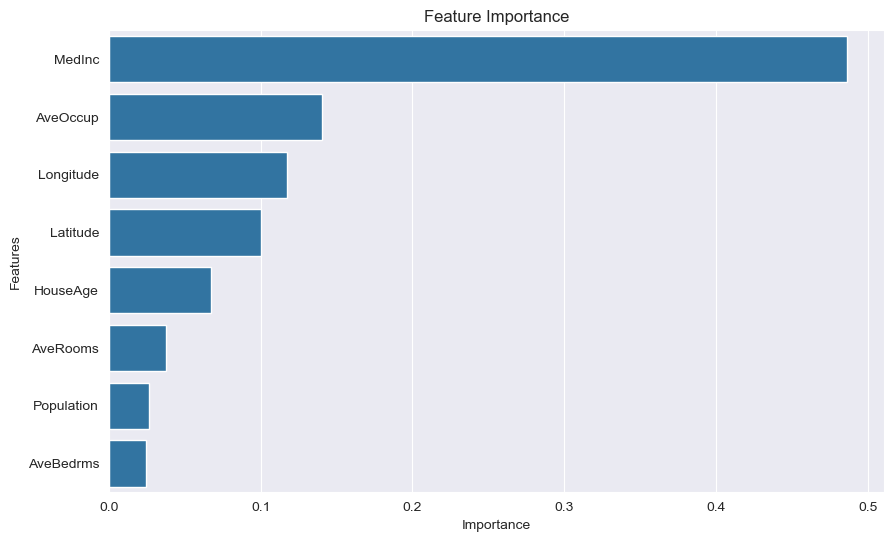

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest 모델 특성 중요도 추출
importances = model_xgb.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importances = pd.DataFrame({'Feature': x.columns, 
                                    'Importance': importances})

# 특성 중요도를 내림차순으로 정렬
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# 차트 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

#### <font color='red'>Q7</font>  하이퍼 파라미터를 조정하여 성능을 개선해 보세요.
> - learning_rate : 학습률<br>
> 학습률이 작을수록 과적합의 위험을 줄여주고, 모델의 안정성을 높일 수 있으나, 너무 작은 학습률은 학습에 많은 시간이 소요됩니다.
> - n_estimators : 의사 결정 트리의 개수<br> 
> 일반적으로 더 많은 트리를 사용할수록 모델의 성능이 향상되지만, 학습 속도는 느려집니다. 이 값을 적절히 조정하여 과적합과 학습 시간 사이의 균형을 맞추어야 합니다.<br>

In [10]:
model_xgb2 = XGBRegressor(random_state=42, learning_rate=0.1, n_estimators=1000)
model_xgb2.fit(x_train, y_train)

y_pred_xgb2 = model_xgb2.predict(x_test)
print("XGB RMSE : ", mean_squared_error(y_test, y_pred_xgb2)**(1/2))

XGB RMSE :  0.468354945766048


#### <font color='red'>Q8</font> 성능이 좋은 모델을 선정하여 테스트 데이터를 불러와서 예측해 보세요.
> 테스트 파일명 : "test.csv"

**📌 <font color='red'>주의사항</font>**<br>
- 불러온 데이터는 학습한 모델에 맞게 예측하기 위해 학습 시 사용한 scaler(MinMaxSclaer)에 맞춰 정규화 작업을 해야 합니다.

In [11]:
# 여기에 작성하세요.
test = pd.read_csv("./data/test.csv")

# 학습 데이터 기준으로 Feature 스케일링 작업
test = scaler.transform(test)

y_pred = model_xgb2.predict(test)

#### <font color='red'>Q9</font> 정답 데이터를 불러와서 테스트 데이터로 예측한 결과의 RMSE를 확인하세요.
> 정답 파일명 : "actual_value.csv"

In [12]:
# 여기에 작성하세요.
y_actual = pd.read_csv("./data/actual_value.csv")

In [13]:
# 여기에 작성하세요.
print("XGB RMSE : ", mean_squared_error(y_actual, y_pred)**(1/2))

XGB RMSE :  0.44971888695535894


---